In [11]:
import pandas as pd
%matplotlib inline

In [12]:
strategy = pd.read_csv("equity_momentum.csv", index_col=0, header=None, parse_dates=True)
benchmark = pd.read_csv("SPXTR.csv", index_col=0, header=None, parse_dates=True)

In [13]:
first_date = pd.Series([benchmark.index[0], strategy.index[0]]).max()
benchmark = benchmark[first_date:]
strategy = strategy[first_date:]

In [14]:
bechmark = benchmark.reindex(strategy.index).ffill()

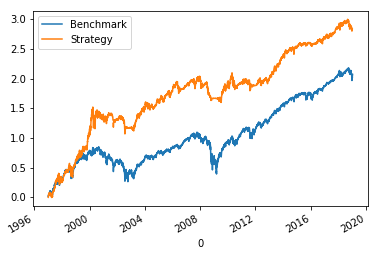

In [16]:
# Plot using cumulative percentage returns
benchmark_perc_returns = benchmark.diff() / benchmark.shift(1)
strategy_perc_returns = strategy.diff() / strategy.shift(1)

benchmark_cum_returns = benchmark_perc_returns.cumsum()
strategy_cum_returns = strategy_perc_returns.cumsum()

both_cum_retunrns = pd.concat([benchmark_cum_returns, strategy_cum_returns], axis=1)
both_cum_retunrns.columns = ["Benchmark", "Strategy"]
both_cum_retunrns.plot();

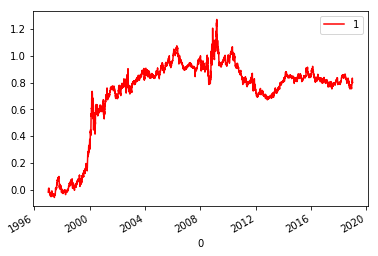

In [22]:
diff_cum_returns = strategy_cum_returns - benchmark_cum_returns
diff_cum_returns.plot(color='r', legend='False');

In [23]:
print(strategy_perc_returns.mean() * 256)

1    0.131047
dtype: float64


In [25]:
print(benchmark_perc_returns.mean() * 256)

1    0.095692
dtype: float64
